**Steps:**
1. Import libraries
2. Import dataframe
3. Data processing
4. Bild a model
5. Model testing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier


In [2]:
# data load
deposit_df_train = pd.read_csv('/kaggle/input/devrepublik03/training_set.csv') # set for training-testing
test_df = pd.read_csv('/kaggle/input/devrepublik03/validation_set.csv') # set for final validation
deposit_df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,61,management,married,tertiary,no,997,no,no,cellular,10,mar,1,-1,0,unknown,yes
1,77,retired,married,tertiary,no,699,no,no,cellular,13,aug,2,-1,0,unknown,yes
2,27,student,single,secondary,no,253,no,no,cellular,25,may,2,-1,0,unknown,yes
3,48,blue-collar,divorced,primary,no,2677,no,no,unknown,20,jun,3,-1,0,unknown,no
4,31,technician,divorced,tertiary,no,0,no,no,cellular,27,aug,6,-1,0,unknown,yes


In [3]:
# make target feature binary 0/1
deposit_df_train['deposit'] = deposit_df_train['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
columns_to_keep = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','poutcome']
test_df = test_df[columns_to_keep]
test_df.shape

# ,,

(1000, 12)

In [4]:
# # В колонке # month Замена: 
# deposit_df_train.replace(to_replace=['jan', 'feb', 'dec','mar','apr','may','jun','jul','aug','sep','oct','nov'],
#            value= ['winter','winter','winter','spring','spring','spring','summer','summer','summer','autumn','autumn','autumn'], 
#            inplace=True)

In [5]:
deposit_df_train['month'].value_counts()

may    2578
aug    1392
jul    1377
jun    1107
nov     853
apr     844
feb     711
oct     353
jan     304
sep     285
mar     252
dec     106
Name: month, dtype: int64

In [6]:
# В колонке #job замена: 
deposit_df_train.replace(to_replace=['unknown', 'housemaid', 'entrepreneur','unemployed','student','self-employed'],
           value= ['other','other','other','other','other','other'], 
           inplace=True)

In [7]:
deposit_df_train['job'].value_counts()

management     2326
blue-collar    1767
technician     1675
other          1635
admin.         1216
services        836
retired         707
Name: job, dtype: int64

In [8]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# В колонке #balance замена:
deposit_df_train.loc[(deposit_df_train['balance'] < 0), 'balance'] = 0
deposit_df_train.loc[(deposit_df_train['balance'] >= 0) & (deposit_df_train['balance'] < 1500), 'balance'] = 1
deposit_df_train.loc[(deposit_df_train['balance'] >= 1500) & (deposit_df_train['balance'] < 3000), 'balance'] = 2
deposit_df_train.loc[(deposit_df_train['balance'] > 3000) , 'balance'] = 3

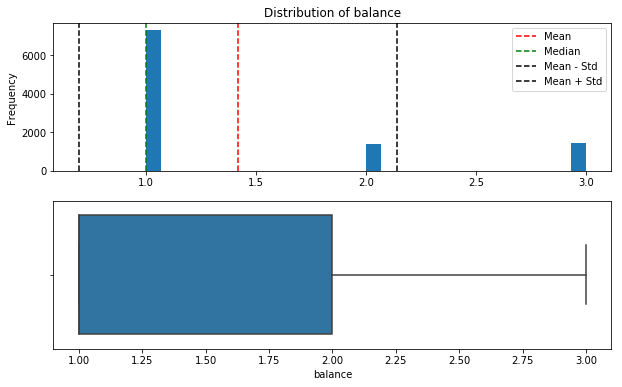

In [10]:
## plot the distribution of  balance
# plot the distribution of bore
bore_mean = deposit_df_train['balance'].mean()

bore_mean = deposit_df_train['balance'].mean()
bore_median = deposit_df_train['balance'].median()
bore_std = deposit_df_train['balance'].std()
bore_missing = deposit_df_train['balance'].isnull().sum()

plt.figure(figsize=(10,6))
plt.subplot(211)
deposit_df_train['balance'].plot.hist(bins=30)
plt.axvline(bore_mean, color='red', linestyle='--')
plt.axvline(bore_median, color='green', linestyle='--')
plt.axvline(bore_mean - bore_std, color='black', linestyle='--')
plt.axvline(bore_mean + bore_std, color='black', linestyle='--')
plt.title('Distribution of balance')
# plt.xlabel('Age')
plt.legend(['Mean', 'Median', 'Mean - Std', 'Mean + Std'])

plt.subplot(212)
sns.boxplot(deposit_df_train['balance'])

plt.show()

In [11]:
print(deposit_df_train['balance'].mean())

1.4188151938594764


In [12]:
deposit_df_train['balance'].value_counts()

1    7334
3    1428
2    1400
Name: balance, dtype: int64

In [13]:
deposit_df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,61,management,married,tertiary,no,1,no,no,cellular,10,mar,1,-1,0,other,1
1,77,retired,married,tertiary,no,1,no,no,cellular,13,aug,2,-1,0,other,1
2,27,other,single,secondary,no,1,no,no,cellular,25,may,2,-1,0,other,1
3,48,blue-collar,divorced,primary,no,2,no,no,other,20,jun,3,-1,0,other,0
4,31,technician,divorced,tertiary,no,1,no,no,cellular,27,aug,6,-1,0,other,1


In [14]:
deposit_df_train['deposit'].value_counts()

0    5332
1    4830
Name: deposit, dtype: int64

In [15]:
deposit_df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,61,management,married,tertiary,no,1,no,no,cellular,10,mar,1,-1,0,other,1
1,77,retired,married,tertiary,no,1,no,no,cellular,13,aug,2,-1,0,other,1
2,27,other,single,secondary,no,1,no,no,cellular,25,may,2,-1,0,other,1
3,48,blue-collar,divorced,primary,no,2,no,no,other,20,jun,3,-1,0,other,0
4,31,technician,divorced,tertiary,no,1,no,no,cellular,27,aug,6,-1,0,other,1


In [16]:
deposit_df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [17]:
deposit_df_train.shape

(10162, 16)

In [18]:
#labelEncoder for all non numerical data
# deposit_df_train_labeled = deposit_df_train.drop('deposit', axis=1).apply(LabelEncoder().fit_transform)

In [19]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,poutcome
0,39,management,married,tertiary,no,285,yes,no,cellular,15,jul,unknown
1,67,retired,married,secondary,no,1146,no,no,cellular,13,nov,failure
2,38,management,single,tertiary,no,91,yes,no,unknown,19,may,unknown
3,28,management,married,tertiary,no,12,yes,no,cellular,9,sep,unknown
4,29,blue-collar,married,secondary,no,8,yes,yes,cellular,10,jul,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,student,single,tertiary,no,1161,no,yes,cellular,16,jun,unknown
996,33,self-employed,married,tertiary,no,263,no,no,cellular,16,nov,failure
997,36,management,married,tertiary,no,6641,no,no,cellular,30,jul,unknown
998,36,blue-collar,divorced,secondary,no,638,yes,no,unknown,16,jun,unknown


In [20]:
# # В колонке #month замена: 
# test_df.replace(to_replace=['jan', 'feb', 'dec','mar','apr','may','jun','jul','aug','sep','oct','nov'],
#            value= ['winter','winter','winter','spring','spring','spring','summer','summer','summer','autumn','autumn','autumn'], 
#            inplace=True)

In [21]:
# В колонке #job замена: 
test_df.replace(to_replace=['unknown', 'housemaid', 'entrepreneur','unemployed','student','self-employed'],
           value= ['other','other','other','other','other','other'], 
           inplace=True)

In [22]:
# В колонке #balance замена:
deposit_df_train.loc[(deposit_df_train['balance'] < 0), 'balance'] = 0
deposit_df_train.loc[(deposit_df_train['balance'] >= 0) & (deposit_df_train['balance'] < 1500), 'balance'] = 1
deposit_df_train.loc[(deposit_df_train['balance'] >= 1500) & (deposit_df_train['balance'] < 3000), 'balance'] = 2
deposit_df_train.loc[(deposit_df_train['balance'] > 3000) , 'balance'] = 3

In [23]:
# DROP SOME COLUMNS becouse of low correlations / hihgt variance and no economyc sence: pdays, previous, campaign, education
deposit_df_train_labeled = deposit_df_train.drop(['deposit','pdays','previous','campaign'], axis=1).apply(LabelEncoder().fit_transform)
test_df = test_df.apply(LabelEncoder().fit_transform)

# 'marital','education'

In [24]:
deposit_df_train_labeled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,poutcome
0,43,2,1,3,0,0,0,0,0,9,7,1
1,59,4,1,3,0,0,0,0,0,12,1,1
2,9,3,2,2,0,0,0,0,0,24,8,1
3,30,1,0,1,0,0,0,0,1,19,6,1
4,13,6,0,3,0,0,0,0,0,26,1,1


In [25]:
deposit_df_train_labeled['month'].value_counts()

8     2578
1     1392
5     1377
6     1107
9      853
0      844
3      711
10     353
4      304
11     285
7      252
2      106
Name: month, dtype: int64

In [26]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,poutcome
0,20,2,1,3,0,218,1,0,0,14,5,1
1,48,4,1,2,0,469,0,0,0,12,9,0
2,19,2,2,3,0,109,1,0,1,18,8,1
3,9,2,1,3,0,70,1,0,0,8,11,1
4,10,1,1,2,0,66,1,1,0,9,5,1


In [27]:
test_df['month'].value_counts()

8     246
5     137
1     127
6     115
9      90
0      79
3      65
4      40
10     39
11     34
7      24
2       4
Name: month, dtype: int64

In [28]:
# train/test split

X = deposit_df_train_labeled
y = deposit_df_train['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# Adaboost
clf_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=148
)

clf_ada.fit(X_train, y_train)
test_y_pred = clf_ada.predict(X_test)

print("Sklearn AdaBoost classifier:")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred): .5f}")
print(f" - f1_score: {f1_score(y_test, test_y_pred): .5f}")

Sklearn AdaBoost classifier:
 - accuracy_score:  0.71114
 - f1_score:  0.65637


In [30]:
# make predictions on a test set and get AUC score
y_pred = clf_ada.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:,1])

0.7711745008570232

Model AdaBoost with Greed Search

In [31]:
# parameters = {
#     'n_estimators': list(range(101, 200)) 
#    }

# #  'max_depth': list(range(100, 1000)), 

In [32]:
# base_model = AdaBoostClassifier()
# gs_model = GridSearchCV(
#     base_model, 
#     parameters, 
#     verbose=True,
#     scoring='roc_auc')

In [33]:
# # Adaboost
# gs_model.fit(X_train, y_train)
# gs_model.best_score_
# gs_model.best_params_
# gs_model.best_estimator_

In [34]:
# AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
#                    n_estimators=148, random_state=None)

# roc_auc = 0.7760502293049913

In [35]:
# y_pred_gs = gs_model.predict(X_test)

In [36]:
# # calculate the AUC
# y_pred_prob_gs = gs_model.predict_proba(X_test)
# fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob_gs[:,1], pos_label=1)

# roc_auc = auc(fpr, tpr)
# roc_auc

# XGBoost

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from xgboost import XGBClassifier

In [39]:
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 20                        # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 6                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14



modelXGB = XGBClassifier(n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [40]:
test_y_pred3 = modelXGB.predict(X_test)

In [41]:
# make predictions on a test set and get AUC score

y_pred = modelXGB.predict_proba(X_test)

roc_auc_score(y_test, y_pred[:,1])

0.7903907130756008

In [42]:
print("Sklearn XGBoost classifier:")
print(f" - accuracy_score: {accuracy_score(y_test, test_y_pred3): .5f}")

print(f" - f1_score: {f1_score(y_test, test_y_pred3): .5f}")

Sklearn XGBoost classifier:
 - accuracy_score:  0.73672
 - f1_score:  0.69156


In [43]:
from sklearn.model_selection import cross_val_score

cross_val_score(modelXGB, X_train, y_train, cv=5).std()

0.010132451609402631

In [44]:
# subm = pd.DataFrame() # create an empty DF for final submissiob
# subm['deposit'] = modelXGB.predict_proba(test_df)[:,1] # create a new column that holds probability of first (1) class
# subm.reset_index(drop=False, inplace=True) # duplicate index as a columns
# subm.to_csv('my_submission.csv', index=False) # save as csv file

In [45]:
# subm.head() 

In [46]:
##

## CatBoost

In [47]:
from catboost import CatBoostClassifier

In [48]:
model_cat = CatBoostClassifier(iterations=180, depth=7, learning_rate=0.1)

# model_cat = CatBoostClassifier(iterations=180, depth=7, learning_rate=0.1)
model_cat.fit(X_train, y_train)

0:	learn: 0.6791523	total: 57.1ms	remaining: 10.2s
1:	learn: 0.6663321	total: 60.6ms	remaining: 5.4s
2:	learn: 0.6547973	total: 63.7ms	remaining: 3.76s
3:	learn: 0.6439884	total: 66.8ms	remaining: 2.94s
4:	learn: 0.6353431	total: 70ms	remaining: 2.45s
5:	learn: 0.6277422	total: 73.1ms	remaining: 2.12s
6:	learn: 0.6216468	total: 76.2ms	remaining: 1.88s
7:	learn: 0.6163322	total: 79ms	remaining: 1.7s
8:	learn: 0.6115697	total: 82.1ms	remaining: 1.56s
9:	learn: 0.6076652	total: 86.2ms	remaining: 1.47s
10:	learn: 0.6032639	total: 89.2ms	remaining: 1.37s
11:	learn: 0.6012011	total: 91.1ms	remaining: 1.27s
12:	learn: 0.5983059	total: 94.9ms	remaining: 1.22s
13:	learn: 0.5945442	total: 98.6ms	remaining: 1.17s
14:	learn: 0.5910054	total: 102ms	remaining: 1.13s
15:	learn: 0.5875807	total: 105ms	remaining: 1.08s
16:	learn: 0.5854288	total: 108ms	remaining: 1.04s
17:	learn: 0.5835502	total: 111ms	remaining: 1s
18:	learn: 0.5816785	total: 114ms	remaining: 969ms
19:	learn: 0.5795746	total: 117ms	re

In [49]:
test_y_pred4 = model_cat.predict(X_test)

In [50]:
# make predictions on a test set and get AUC score

y_pred = model_cat.predict_proba(X_test)

roc_auc_score(y_test, y_pred[:,1])

0.791876675669864

In [51]:
0.8033339760774776 - 0.80172

0.0016139760774775969

In [52]:
# Best model

subm = pd.DataFrame() # create an empty DF for final submissiob
subm['deposit'] = model_cat.predict_proba(test_df)[:,1] # create a new column that holds probability of first (1) class
subm.reset_index(drop=False, inplace=True) # duplicate index as a columns
subm.to_csv('my_submission.csv', index=False) # save as csv file

## sklearn.ensemble.HistGradientBoostingClassifier

In [53]:
# from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# from sklearn.ensemble import HistGradientBoostingClassifier

In [54]:
# model_hist = HistGradientBoostingClassifier(max_iter=170, max_depth=7, learning_rate = 0.11)
# model_hist.fit(X_train, y_train)

In [55]:
# make predictions on a test set and get AUC score

# test_y_pred5_hist = model_hist.predict(X_test)

# y_pred = model_hist.predict_proba(X_test)

# roc_auc_score(y_test, y_pred[:,1])

In [56]:
# # Analysys of DF
# from pandas_profiling import ProfileReport
# ProfileReport(deposit_df_train, title='Pandas Profiling Report', html={'style':{'full_width':True}})

## Model Hist Boost with Greed Search

In [57]:
# parameters = {
#     'max_iter' : list(range(50, 300)), 
#     'max_depth': list(range(2, 10))
#    }

In [58]:
# base_model = HistGradientBoostingClassifier()
# gs_model_hist = GridSearchCV(
#     base_model, 
#     parameters, 
#     verbose=True,
#     scoring='roc_auc')

In [59]:
# # # Hist Boost
# gs_model_hist.fit(X_train, y_train)
# gs_model_hist.best_score_
# gs_model_hist.best_params_
# gs_model_hist.best_estimator_